# <u>Objective: Predict if a customer will default on a credit card payment or not</u>
### Draft 1
## <u> Introduction</u>
Credit cards are one of the main sources of revenue for major banks today. As the number of customers using credit cards steadily grows, defaults on credit card payments are also growing. Additionally, as it becomes easier to get a credit card even with a limited credit history, the risk of a large number of customers defaulting on a credit card payment only grows.

#### Some interesting facts
- With the economy growing again, the number of credit card payment deliquencies have also gone up touching 2.54% for the Q1 2018, the highest in 6 years (Source: Experian.com)
- Credit card deliquencies for smaller banks touched 5.4% this year, the highest number since the financial crisis of 2008-09, suggesting that smaller banks are at a greater risk than their global counterparts (source EPM Macro Research)
- credit card default information if available - impact of customer defaults on credit cards.


After the financial crisis of 2008-09, banks made it difficult to obtain a loan as they becaome more alert in identifying and classifying non-performing loans, but that is slowly changing as the economy soars again and banks are making it easier to obtain a line of credit. 


## <u>Objective</u>
This study was undertaken by me on behalf of the bank. The objective, for the bank, is to be able to identify clients who can potentially default on their credit card payment. The bank has a large amount of customer data but for reasons related to privacy concerns, only a limited list of features is available to us to perform the analysis. 

Our objective is to build a model, based on the data provided by the bank, which predicts with maximum accuracy, which customers will default on their payment. 

Following the analysis as well as decifing on a model to use for the prediction, the bank can then take a number of measures to ensure or increase the chances of payments or prepare for delays.

## <u>Data Set Information</u>
- As obtained from the data source: [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients]
Below is the actual text of the dataset from the source.

> This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:-

>X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

>X2: Gender (1 = male; 2 = female). 

>X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

>X4: Marital status (1 = married; 2 = single; 3 = others). 

>X5: Age (year). 

>X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
X7 = the repayment status in August, 2005;
. . .;X11 = the repayment status in April, 2005.

>The measurement scale for the repayment status is: -1 = pay duly;
1 = payment delay for one month; 
2 = payment delay for two months;
. . .; 8 = payment delay for eight months;
9 = payment delay for nine months and above. 

>X12-X17: Amount of bill statement (NT dollar).
X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August, 2005;
. . .; X17 = amount of bill statement in April, 2005.


>X18-X23: Amount of previous payment (NT dollar).
X18 = amount paid in September, 2005;
X19 = amount paid in August, 2005;
. . .;X23 = amount paid in April, 2005.

*It is important to note that the data is almost 15 years old. 15 years ago, banks had a much limited amount of information about customers and their spending habits as compared to today and perhaps models created today with the additional information will be able to predict better*

##### Remark on data quality
This data set is very clean and has very few errors and missing values. It would be safe to assume that the data set was cleaned before being poseted on the source.

## <u>Methodology</u>

### Objective and Approach

The objective of the bank is to identify the customers who are most likely to default based on their previous payment and billing history, as well as some demographic information. The customers who are most likely to default can be approached in many ways using a default prevention campaign which could do the following:-
 - Approached with reminder emails/text messages/phone calls to remind them of their minimum payment due and balance, well before their next payment
 - Approached with special emails with helpful information about controlling credit card debt
 - For customers who have very large balances, will be approached with special schemes to reduce thier debt

The first step will be to identify the customers who are most likely to default. This is a binary classification problem with 1 representing that the customer will default, and 0 representing a customer who will not default. Since the model will never be 100% accurate or precise everytime, we need to consider the errors in our calculations.

There are four possibilities for each and every customer classified as a defaulter(1) or non-defaulter(0)

- i) Customer is a non-defaulter(0) and is correctly classified as a non-defaulter(0). Also known as  <i>True Negative</i>.
- ii) Customer is a defaulter(1) and is incorrectly classified as a non-defaulter(0). Also known as  <b>False Negative</b>.
- iii) Customer is a defaulter(1) and is correctly classified as a defaulter(1). Also known as <i>True Positive</i>.
- iv) Customer is a non-defaulter(0) and is incorrectly classified as a defaulter(1). Also known as <b>False Positive</b>.

Assuming the average cost for running the default prevention campaign is <b>C</b> and the average revenue recovered from each customer is <b>R</b>, the bank has to minimize <b>C</b> and maximize <b>R</b>.
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}
tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
<table style="width:60%">
  <tr>
      <th style="text-align: left"><b>Case</b></th>
      <th style="text-align: left"><b>Description</b></th>
      <th style="text-align: left"><b>Default Prevention</b></th>
      <th style="text-align: left"><b>Gross Profit</b></th> 
      <th style="text-align: left"><b>Maximize/Minimize</b></th>
  </tr>
  <tr>
    <td style="text-align: left">True Negative</td>
    <td style="text-align: left"> 0 classified as 0</td>
    <td style="text-align: left"> Correctly not targeted. No Cost. Only Revenue. </td>  
    <td style="text-align: left"> R </td>
    <td style="text-align: left"> Maximize </td>  
  </tr>
  <tr>
    <td style="text-align: left"><i>False Negative</i></td>
    <td style="text-align: left"> 1 classified as 0</td>
    <td style="text-align: left"> Incorrectly not targeted. No Cost. But loss of revenue. </td>
    <td style="text-align: left"> -R </td>
    <td style="text-align: left"> Minimize </td>
  </tr>
  <tr>
    <td style="text-align: left">True Positive</td>
    <td style="text-align: left"> 1 classified as 1</td>
    <td style="text-align: left"> Correctly targeted. Incurs cost but payment is recovered </td>  
    <td style="text-align: left"> R - C </td>
    <td style="text-align: left"> Maximize </td>
  </tr>
  <tr>
    <td style="text-align: left"><i>False Positive</i></td>
    <td style="text-align: left"> 0 classified as 1</td>
    <td style="text-align: left"> Incorrectly targeted. But incurs cost.  </td>    
    <td style="text-align: left"> R - C </td>
    <td style="text-align: left"> Minimize </td>
  </tr>  
</table>

The False Negatives and the False Positives result in loss of revenue in some form. All the revenue is lost in case of a false negative and there is an extra cost of the campaign which gets reduced from the revenue, in case of a false positive. The bank can afford to have false positives, because the bank still earns some revenue in that case but in case of false negatives, the bank loses all the possible revenue. False negatives need to be minimized. 

### Data Import and Cleaning
The data was imported using the Pandas package and the read_csv method. The data set is a csv file. Before importing the data, the columns were renamed in the csv file itself. As you can notice, the columns had the X1, X2,X3...nomenclature. This was replaced with the actual column names for easier understanding of the data. 

The cleaning required was minimal due to the high quality of the data set. 

### Exploratory Data Analysis using Data Vizualizations
Exploratory data analysis has been done by using the following packages:-
 - matplotlib for graphs and charts related to the predictive models
 - seaborn for exploratory data analysis
 
matplotlib has been used more extensively as seaborn resulted in slower rendering of the graphs because of the size of the dataset. 

### Feature Selection and Feature Engineering
The dataset is financial data with a large number of parameters - 23 in total. Some of the variables cannot be broken down further due to their fundamental nature: age, gender, marital status, education etc. The other variables related to the payment are also , more or less, non modifyable. However, this doesnt mean that featre engineering is not possible or required in this scenario. 

In order to finalize a model, I began working without any feature engineering and developing a model based on the present data. 
Once the model performance is analysed, I began working on some feature engineering (mentioned later in the report) to see how it impacts the model's performance. 


### Models 
Since this is a classification problem in supervised learning, I chose the following models.

   #### *Logistic Regression*
   
   #### *K-Nearest Neighbours*
   
   #### *Decision Tree Classification*
   
   #### *Random Forest*
   
   
### Model Evaluation
Model evaluation is done based on the following parameters:-

 - Accuracy
 - ROC curve
 - Precision
 - Recall

Accuracy of the models is not vitally important in this scenario because precision and recall are more important because they consider false positives (precision) and false negatives (recall) in their calculations which are two values we are trying to minimize. 

Our objective is to reduce the number of false negatives as much as possible. To achive this, different probability thresholds have been tried for different models. The best one is identified based on the the minimum number of false positives and false negatives. 

### Assumptions and Limitations


## <u>Conclusion and Client Recommendation</u>

## <u>Future Research</u>

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

### Package Import

In [1]:
# Importing all packages used for the analysis
#Data Cleaning and Exploratory Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#Data manipulation
import re

#Supervised learning models
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#kNN
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


#Model performance
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

#Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Helper Methods

In [2]:
#function -  ecdf: helper method to chart ECDF graphs
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### I. Data Import and Cleaning
In this section, we will be looking at importing the data and checking it for missing or erronous data. It is important to note that this is a very clean data set without any nulls or missing values. There were zeroes and certain categories which have very low distribution of values as compared to other categories, but overall, the dataset is very clean with few outliers.

In [3]:
#importing file - saved file as csv file and then read it
df = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v2.csv')
#attribute to get column names
print(df.columns)
print('=====================================')
#shape of the data
print('Data Shape:',df.shape)
print('=====================================')

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Data Shape: (30000, 25)


This dataset has 25 columns and 30000 rows

In [4]:
#practice basics
#basic info about the dataset - 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

The info shows that there are no blank/missing values
Categorized data: sex, education, marriage, age-group - need to add column to the data.
Converting sex, education and marriage to categories may save space and will be useful when modelling through random forests and decision trees. 

In [5]:
#renaming 'default payment next month' to 'default'
df['default'] = df['default payment next month']
df.drop(['default payment next month'], 1, inplace=True)

#rename column PAY_0 to PAY_1 for uniformity
df.rename(columns={'PAY_0':'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
# practice basics
#describing the data to identify possible outliers
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

Comments on above:-
1. Education field has a max value of 6 which may be an error
2. Marriage field has a max value of 3 which may be an error

Below, we will look at some categories and explore the data as well as the target variable in light of these categories to notice relationships.

### II. Exploratory Data Analysis and Data Vizualization

#### <u> Basic Summary Statistics for category variables </u>

Lets look at some categorical variables and see how they are distributed across the default status. 
Below are some basic bar plots and histograms, along with the distributon of the categories across the loan default status.


2    18112
1    11888
Name: SEX, dtype: int64


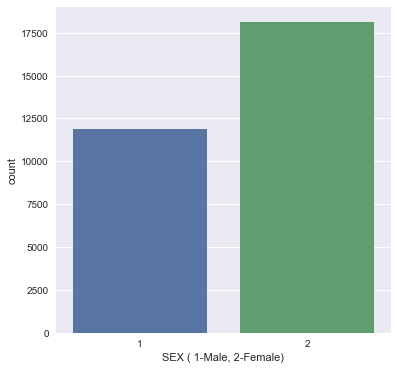

default  SEX
0        1       9015
         2      14349
1        1       2873
         2       3763
Name: ID, dtype: int64


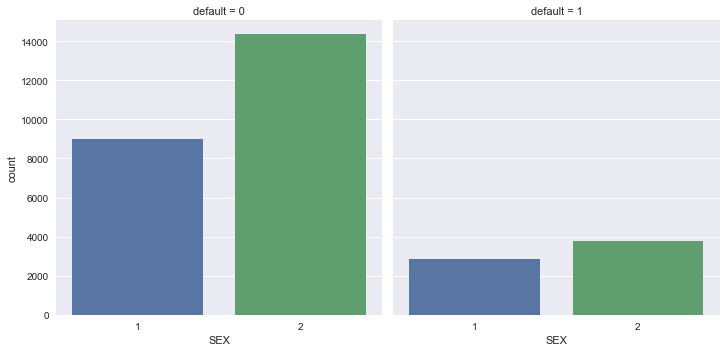

In [7]:
#value_counts() - trying to identify outliers + plotting bar charts for each of the dimensions to observe distribution
#Ploting bar charts because these are all categorical values
print('=====================================')
print(df['SEX'].value_counts(dropna=False))
print('=====================================')
plt.figure(figsize=(6,6))
_ = sns.countplot(x='SEX',data=df) #seaborn's countplot to plot bar charts showing counts
plt.xlabel('SEX ( 1-Male, 2-Female)')
plt.show()

print('=====================================')
print(df.groupby(['default','SEX']).ID.count())
print('=====================================')

_ = sns.factorplot(x='SEX', col='default', data=df, kind='count', size =5)
plt.show()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


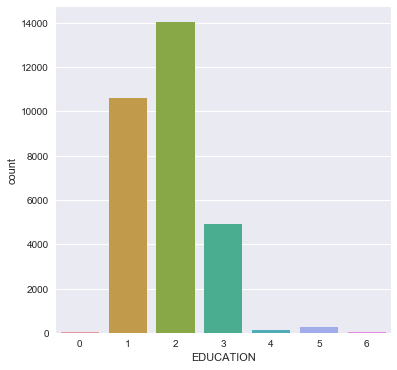

default  EDUCATION
0        0               14
         1             8549
         2            10700
         3             3680
         4              116
         5              262
         6               43
1        1             2036
         2             3330
         3             1237
         4                7
         5               18
         6                8
Name: ID, dtype: int64


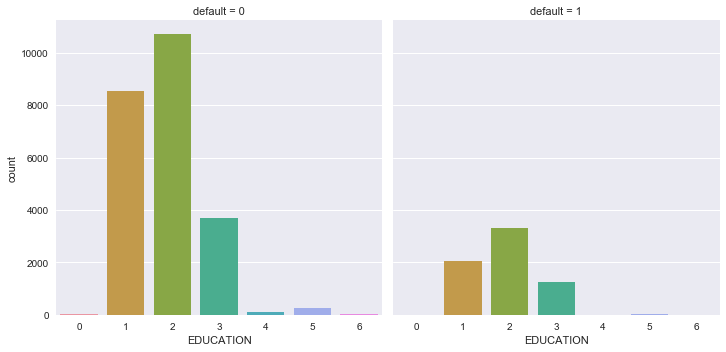

In [8]:
print('=====================================')
print(df['EDUCATION'].value_counts(dropna=False))
print('=====================================')
plt.figure(figsize=(6,6))
_ = sns.countplot(x='EDUCATION',data=df) #seaborn's countplot to plot bar charts showing counts
#plt.xlabel('SEX ( 1-Male, 2-Female)')
plt.show()

print('=====================================')
print(df.groupby(['default','EDUCATION']).ID.count())
print('=====================================')

_ = sns.factorplot(x='EDUCATION', col='default', data=df, kind='count', size =5)
plt.show()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


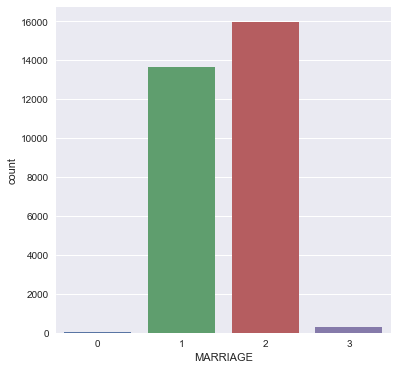

default  MARRIAGE
0        0              49
         1           10453
         2           12623
         3             239
1        0               5
         1            3206
         2            3341
         3              84
Name: ID, dtype: int64


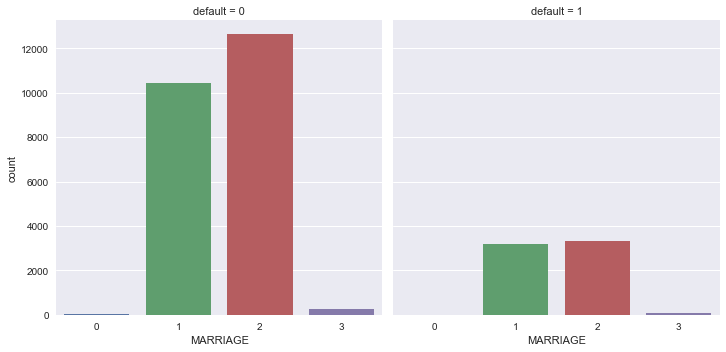

In [9]:
print('=====================================')
print(df['MARRIAGE'].value_counts(dropna=False))
print('=====================================')
plt.figure(figsize=(6,6))
_ = sns.countplot(x='MARRIAGE',data=df) #seaborn's countplot to plot bar charts showing counts
#plt.xlabel('SEX ( 1-Male, 2-Female)')
plt.show()

print('=====================================')
print(df.groupby(['default','MARRIAGE']).ID.count())
print('=====================================')

_ = sns.factorplot(x='MARRIAGE', col='default', data=df, kind='count', size =5)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------
More statistics for AGE
MEAN AGE:  35.4855
MEDIAN AGE:  34.0


29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

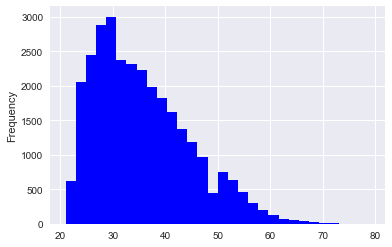

In [10]:
print('=====================================')
print(df['AGE'].plot(kind='hist', color = 'blue', bins = 30))
print('-------------------------------------')
print('=====================================')
print('More statistics for AGE')
print("MEAN AGE: ",np.mean(df['AGE']))
print("MEDIAN AGE: ",np.median(df['AGE']))
print('=====================================')

df.AGE.describe()
df.AGE.value_counts()

From the above value_counts() check, we can conclude the following:-
1. Education category has 6 values (0 to 6) Below is the explaination for the EDUCATION field in the data set information.
   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
   5 and 6 are not accounted for but rows of the data do not seem to be errors.
   
2. Marriage category has 4 values (0 to 3) Below is the explaination for the MARRIAGE field in the data set information.
   X4: Marital status (1 = married; 2 = single; 3 = others)
   0 is unaccounted for. There are 54 values under 0 so it desnt seem to be an error.

3. Ages are between 29 and 79 so possibly no erronous values

Lets look at some more important fields. Fields PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 represent the number of months of delay in payment by a customer. A value of 0 represents an on time payment. A value of 1 represents a delay of 1 month and so on. Similarly, a value of -1 represents a payment done before the due date. 

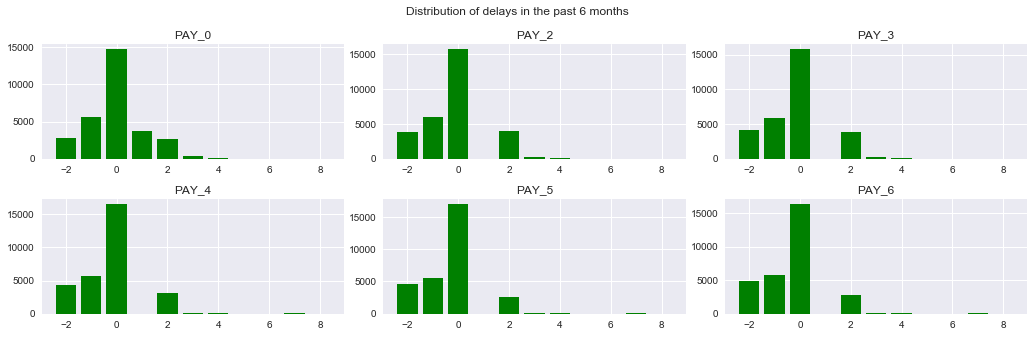

In [11]:
#histograms to see distribution of payment delays for all customers 
columnNamePattern = re.compile("^PAY_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (columnNamePattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of delays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

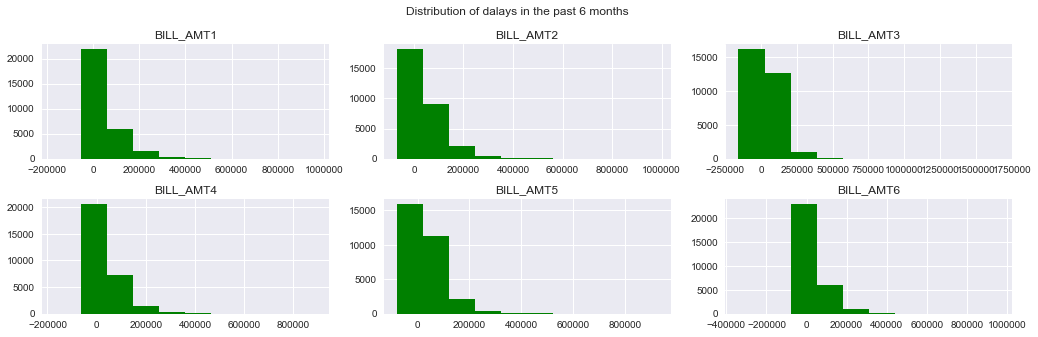

In [12]:
billAMtPattern = re.compile("^BILL_AMT[0-9]+$")
bill_amt_columns = [ x for x in df.columns if (billAMtPattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of dalays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[bill_amt_columns[i]].value_counts()
    ax[row,col].hist(df[bill_amt_columns[i]], align='mid', color='g')
    ax[row,col].set_title(bill_amt_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

Most people pay on time but a sizeable number of them are late in their payments. Most of the delays are more than 1 month.


### <u>More data vizualization using ECDFs, Scatter Plots etc.</u>

Histograms can suffer from Binning Bias. Emperical Cumilative Distribution Function can help get a better picture of the data. Attempting some ECDFs for single dimension measures. Creating a function to calculate ECDFs.

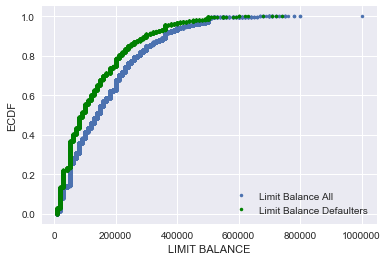

In [13]:
#ECDF on Balance limits
x_limitBal, y_limitBal = ecdf(df['LIMIT_BAL'])
df_default=df.loc[df['default']==1]
x_limitBal_d, y_limitBal_d = ecdf(df_default['LIMIT_BAL'])

_=plt.plot(x_limitBal,y_limitBal,marker='.', linestyle='none')
_=plt.plot(x_limitBal_d,y_limitBal_d,marker='.', linestyle='none', color='g')

plt.margins(0.05)
_=plt.xlabel('LIMIT BALANCE')
_=plt.ylabel('ECDF')
plt.legend(('Limit Balance All', 'Limit Balance Defaulters'), loc='lower right')
plt.show()

95% of the customers have balance limit below or equal to 400,000. 1 person has balance limit of $1Mil. 

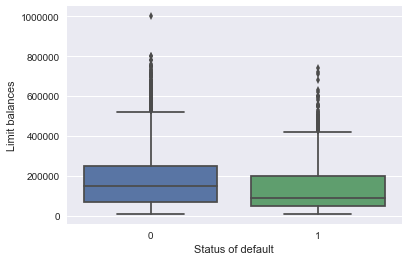

In [14]:
#boxplot
sns.boxplot(x='default', y='LIMIT_BAL', data=df)
_=plt.xlabel('Status of default')
_=plt.ylabel('Limit balances')
plt.show()

Box plots suggest that the for those who default, balance limits beyond 400,000 are clearly outliers. The 75th percentile lies on 200,000. 

## Models

The models used here are for classifying data hence I have used models popularly used for these kind of models. The models have been executed twice. The first run is without any modification to the features. The second run includes some feature engineering and modification.

This has been done to identify the impact of feature engineering on such a data set. The other purpose is to also show the impact of feature engineering on methods and whether it makes any difference in such a data set. This understanding will help save time on similar data sets or if similar features are added to the data set. 

The models I have used are:-

- kNN (k Nearest Neighbours)
- Logistic Regression
- SVM (Support Vector Machines)
- Decision Tree Classification
- Random Forests

### Which model is the best? 

To identify which model is the best, we have used the following tests:-
 - Accuracy
 - Confusion Matrix
 - ROC Curve
 - <b>Precision and recall</b>

#### Importance of Precision and Recall

Predicting the customers who will default on their payment is a classification problem. Although this data set is not a 'pure' data set (with only numerical or only categorical) data points, the precision and recall is very important, almost equally important to accuracy.

Precision here would be defined as the number of correctly classified values. Its also important to note that we will have two precision values - one for 0 or non-defaulters or True Neatives and one for 1 or defaulters or True Positives. Our aim should be a high precision value for both. A model with a high precision value for 1, will be preffered if it also has a high precision value for 0.

Recall 

Based on the observations of these tests, we will conclude which model is the best for this scenario. 

These tests will be done on the unmodified data set as well as the dataset with feature engineering.


In [15]:
## Re-loading the data frame - no changes/without feature engineering
df_unchanged = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v2.csv')
df_unchanged.drop(['ID'], 1, inplace=True)
df_unchanged['default']=df_unchanged['default payment next month'].astype('category')
df_unchanged.drop(['default payment next month'], 1, inplace=True)

Separating the data and target variables and then splitting the training and test sets
The test size is 30% of all the rows. The training will be done on 70% of the rows.

In [16]:
X= np.array(df_unchanged.drop(['default'],1))
y= np.array(df_unchanged['default'])
X_Train,X_Test, y_Train,y_Test = cross_validation.train_test_split(X,y,test_size = 0.3)

#### Assumptions
Lets assume the average revenue per customer is 100 USD and the cost per customer is 20 USD. These are hypothetical numbers and can be edited here.

In [20]:
R = 100
C = 10

###  kNN

The kNN is applied on the dataset with varying number of nearest neighbor values. The range taken below is between 0 and 9.
Using GridSearchCV, we try to identify which knn model performs the best when the number of nearest neighbors varies between 0 and 9.

In [17]:
param_grid_knn = {'n_neighbors':[20,30,40,50,60,70,80,90,100]}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'accuracy')

knn_cv.fit(X_Train, y_Train)

print('Grid Scores: ',knn_cv.grid_scores_)
print('Best Scores (Accuracy): ',knn_cv.best_score_)
print('Best Parameters: ',knn_cv.best_params_)

Grid Scores:  [mean: 0.77629, std: 0.00130, params: {'n_neighbors': 20}, mean: 0.77581, std: 0.00215, params: {'n_neighbors': 30}, mean: 0.77586, std: 0.00198, params: {'n_neighbors': 40}, mean: 0.77643, std: 0.00150, params: {'n_neighbors': 50}, mean: 0.77738, std: 0.00085, params: {'n_neighbors': 60}, mean: 0.77857, std: 0.00089, params: {'n_neighbors': 70}, mean: 0.77905, std: 0.00166, params: {'n_neighbors': 80}, mean: 0.77929, std: 0.00179, params: {'n_neighbors': 90}, mean: 0.77948, std: 0.00186, params: {'n_neighbors': 100}]
Best Scores (Accuracy):  0.7794761904761904
Best Parameters:  {'n_neighbors': 100}


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [18]:
y_predicted_knn = knn_cv.predict(X_Test)
print('KNN - accuracy score: ',(accuracy_score(y_Test, y_predicted_knn)))

knn_matrix = confusion_matrix(y_Test, y_predicted_knn)
knn_classification = classification_report(y_Test, y_predicted_knn)

print(knn_classification)
print(knn_matrix)

tn, fp, fn, tp = confusion_matrix(y_Test, y_predicted_knn).ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

KNN - accuracy score:  0.7823333333333333
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      7038
          1       0.51      0.04      0.07      1962

avg / total       0.73      0.78      0.70      9000

[[6968   70]
 [1889   73]]
True Negative (0 as 0):  6968
False Positive (0 as 1) (Minimize):  70
False Negative (1 as 0) (Minimize):  1889
True Positive (1 as 1) :  73


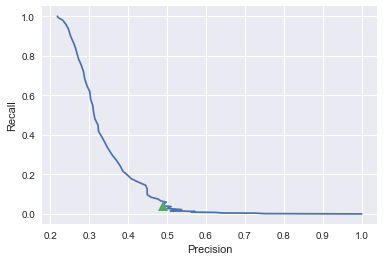

In [19]:
knn_probability = knn_cv.predict_proba(X_Test)
knn_probability_default = knn_probability[:,1]

precision_knn, recall_knn, threshold_knn = precision_recall_curve(y_Test,knn_probability_default)

plt.plot(precision_knn, recall_knn,label = 'kNN')

close_default_knn = np.argmin(np.abs(threshold_knn - 0.5))

plt.plot(precision_knn[close_default_knn], recall_knn[close_default_knn], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [31]:
count = []
knn_rev = pd.DataFrame()
knn_threshold = []
knn_revenue = []
knn_prob = [0.2,0.3,0.4,0.5,0.6]
for thrshld in knn_prob:
    for prob in knn_probability:
        if prob[1]> thrshld:
            count.append(1)
        else:
            count.append(0)
        
    knn_newProbPredict = np.array(count)
    tn, fp, fn, tp = confusion_matrix(y_Test, knn_newProbPredict).ravel()
    print("Accuracy score when prob is ", thrshld, " :",accuracy_score(y_Test, knn_newProbPredict) )
    tnRev = tn*R
    fpRev = fp*(R-C)
    fnRev = fn*(-R)
    tpRev = tp*(C)
    print("Total revenue when prob threshold is ",thrshld," : ", (tnRev+fpRev+fnRev+tpRev))
    knn_threshold.append(thrshld)
    knn_revenue.append(tnRev+fpRev+fnRev+tpRev)
    count = []
    
knn_rev['Threshold'] = knn_threshold
knn_rev['Revenue'] = knn_revenue


Accuracy score when prob is  0.2  : 0.5223333333333333
Total revenue when prob threshold is  0.2  :  632230
Accuracy score when prob is  0.3  : 0.6834444444444444
Total revenue when prob threshold is  0.3  :  580530
Accuracy score when prob is  0.4  : 0.7693333333333333
Total revenue when prob threshold is  0.4  :  538360
Accuracy score when prob is  0.5  : 0.7823333333333333
Total revenue when prob threshold is  0.5  :  514930
Accuracy score when prob is  0.6  : 0.7825555555555556
Total revenue when prob threshold is  0.6  :  508450


## Logistic regression

In [ ]:
param_grid_logreg = {'C':[0.001,0.01,0.1,1,10,100]}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring = 'accuracy')

logreg_cv.fit(X_Train, y_Train)

print('Grid Scores: ',logreg_cv.grid_scores_)
print('Best Scores (Accuracy): ',logreg_cv.best_score_)
print('Best Parameters: ',logreg_cv.best_params_)

In [ ]:
y_predicted_logreg = logreg_cv.predict(X_Test)
print('Logistic regression - accuracy score: ',(accuracy_score(y_Test, y_predicted_logreg)))

logreg_matrix = confusion_matrix(y_Test, y_predicted_logreg)
tn, fp, fn, tp = confusion_matrix(y_Test, y_predicted_logreg).ravel()
logreg_classification = classification_report(y_Test, y_predicted_logreg)

print(logreg_classification)
print(logreg_matrix)

print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

In [ ]:
logreg_probability = logreg_cv.predict_proba(X_Test)
logreg_probability_default = logreg_probability[:,1]

precision_logreg, recall_logreg, threshold_logreg = precision_recall_curve(y_Test,logreg_probability_default)

plt.plot(precision_logreg, recall_logreg,label = 'Logreg')

close_default_logreg = np.argmin(np.abs(threshold_logreg - 0.5))

plt.plot(precision_logreg[close_default_logreg], recall_logreg[close_default_logreg], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [ ]:
count = []
logreg_rev = pd.DataFrame()
logreg_threshold = []
logreg_revenue = []
logreg_prob = [0.2,0.3,0.4,0.5,0.6]
for thrshld in logreg_prob:
    for prob in logreg_probability:
        if prob[1]> thrshld:
            count.append(1)
        else:
            count.append(0)
        
    logreg_newProbPredict = np.array(count)
    tn, fp, fn, tp = confusion_matrix(y_Test, logreg_newProbPredict).ravel()
    print("Accuracy score when prob is ", thrshld, " :",accuracy_score(y_Test, logreg_newProbPredict) )
    tnRev = tn*R
    fpRev = fp*(R-C)
    fnRev = fn*(-R)
    tpRev = tp*(C)
    print("Total revenue when prob threshold is ",thrshld," : ", (tnRev+fpRev+fnRev+tpRev))
    logreg_threshold.append(thrshld)
    logreg_revenue.append(tnRev+fpRev+fnRev+tpRev)
    count = []
    
logreg_rev['Threshold'] = knn_threshold
logreg_rev['Revenue'] = knn_revenue

## Decision Trees

In [32]:
param_grid_dt = {'min_samples_split':[10,100,1000,10000,100000], 'max_depth':[10,100,150,200,250]}
dt = DecisionTreeClassifier()

dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring = 'accuracy')

dt_cv.fit(X_Train, y_Train)

print('Grid Scores: ',dt_cv.grid_scores_)
print('Best Scores (Accuracy): ',dt_cv.best_score_)
print('Best Parameters: ',dt_cv.best_params_)

Grid Scores:  [mean: 0.80471, std: 0.00263, params: {'max_depth': 10, 'min_samples_split': 10}, mean: 0.80829, std: 0.00368, params: {'max_depth': 10, 'min_samples_split': 100}, mean: 0.81833, std: 0.00281, params: {'max_depth': 10, 'min_samples_split': 1000}, mean: 0.81838, std: 0.00291, params: {'max_depth': 10, 'min_samples_split': 10000}, mean: 0.77743, std: 0.00007, params: {'max_depth': 10, 'min_samples_split': 100000}, mean: 0.73781, std: 0.00655, params: {'max_depth': 100, 'min_samples_split': 10}, mean: 0.79205, std: 0.00539, params: {'max_depth': 100, 'min_samples_split': 100}, mean: 0.81814, std: 0.00278, params: {'max_depth': 100, 'min_samples_split': 1000}, mean: 0.81838, std: 0.00291, params: {'max_depth': 100, 'min_samples_split': 10000}, mean: 0.77743, std: 0.00007, params: {'max_depth': 100, 'min_samples_split': 100000}, mean: 0.73757, std: 0.00810, params: {'max_depth': 150, 'min_samples_split': 10}, mean: 0.79205, std: 0.00483, params: {'max_depth': 150, 'min_samples

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [33]:
y_predicted_dt = dt_cv.predict(X_Test)
print('Decision Trees - accuracy score: ',(accuracy_score(y_Test, y_predicted_dt)))

dt_matrix = confusion_matrix(y_Test, y_predicted_dt)
dt_classification = classification_report(y_Test, y_predicted_dt)

print(dt_classification)
print(dt_matrix)

tn, fp, fn, tp = dt_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

Decision Trees - accuracy score:  0.8224444444444444
             precision    recall  f1-score   support

          0       0.84      0.96      0.89      7038
          1       0.69      0.34      0.45      1962

avg / total       0.81      0.82      0.80      9000

[[6742  296]
 [1302  660]]
True Negative (0 as 0):  6742
False Positive (0 as 1) (Minimize):  296
False Negative (1 as 0) (Minimize):  1302
True Positive (1 as 1) :  660


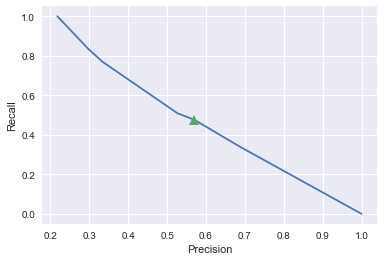

In [34]:
dt_probability = dt_cv.predict_proba(X_Test)
dt_probability_default = dt_probability[:,1]

precision_dt, recall_dt, threshold_dt = precision_recall_curve(y_Test,dt_probability_default)

plt.plot(precision_dt, recall_dt,label = 'Decision Tree')

close_default_dt = np.argmin(np.abs(threshold_dt - 0.5))

plt.plot(precision_dt[close_default_dt], recall_dt[close_default_dt], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [35]:
count = []
dt_rev = pd.DataFrame()
dt_threshold = []
dt_revenue = []
dt_prob = [0.2,0.3,0.4,0.5,0.6]
for thrshld in dt_prob:
    for prob in dt_probability:
        if prob[1]> thrshld:
            count.append(1)
        else:
            count.append(0)
        
    dt_newProbPredict = np.array(count)
    tn, fp, fn, tp = confusion_matrix(y_Test, dt_newProbPredict).ravel()
    print("Accuracy score when prob is ", thrshld, " :",accuracy_score(y_Test, dt_newProbPredict) )
    tnRev = tn*R
    fpRev = fp*(R-C)
    fnRev = fn*(-R)
    tpRev = tp*(C)
    print("Total revenue when prob threshold is ",thrshld," : ", (tnRev+fpRev+fnRev+tpRev))
    dt_threshold.append(thrshld)
    dt_revenue.append(tnRev+fpRev+fnRev+tpRev)
    count = []
    
dt_rev['Threshold'] = knn_threshold
dt_rev['Revenue'] = knn_revenue

Accuracy score when prob is  0.2  : 0.6148888888888889
Total revenue when prob threshold is  0.2  :  643660
Accuracy score when prob is  0.3  : 0.8074444444444444
Total revenue when prob threshold is  0.3  :  603390
Accuracy score when prob is  0.4  : 0.8074444444444444
Total revenue when prob threshold is  0.4  :  603390
Accuracy score when prob is  0.5  : 0.8224444444444444
Total revenue when prob threshold is  0.5  :  577240
Accuracy score when prob is  0.6  : 0.8224444444444444
Total revenue when prob threshold is  0.6  :  577240


## Random Forest

In [ ]:
param_grid_rf = {'n_estimators': [1,5,10,100,200],
              'min_samples_split': [10,100,1000],
              'max_depth':[10,100,200,250,300]}
rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring = 'accuracy')

rf_cv.fit(X_Train, y_Train)

print('Grid Scores: ',rf_cv.grid_scores_)
print('Best Scores (Accuracy): ',rf_cv.best_score_)
print('Best Parameters: ',rf_cv.best_params_)

In [ ]:
y_predicted_rf = rf_cv.predict(X_Test)
print('Random Forest - accuracy score: ',(accuracy_score(y_Test, y_predicted_rf)))

rf_matrix = confusion_matrix(y_Test, y_predicted_rf)
rf_classification = classification_report(y_Test, y_predicted_rf)

print(rf_classification)
print(rf_matrix)

tn, fp, fn, tp = rf_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

In [ ]:
rf_probability = rf_cv.predict_proba(X_Test)
rf_probability_default = rf_probability[:,1]

precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_Test,rf_probability_default)

plt.plot(precision_rf, recall_rf,label = 'Random Forest')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [ ]:
count_rf = []
for prob in rf_probability:
    if prob[1]> .4:
        count_rf.append(1)
    else:
        count_rf.append(0)
        
rf_newProbPredict = np.array(count_rf)

accuracy_score(y_Test, rf_newProbPredict)

rf_matrix = confusion_matrix(y_Test, rf_newProbPredict)
print('Decision Trees - confusion matrix:\n {}\n'.format(rf_matrix))

rf_classification = classification_report(y_Test, rf_newProbPredict)
print('Desicion Trees - classification report:\n {}\n'.format(rf_classification))

tn, fp, fn, tp = rf_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

## Comparing Model Performance

### Plotting kNN accuracy and metrics

In [ ]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

plt.title('k-NN: Varying Number of Neighbors: Precision & Recall')
plt.plot(neighbors, knn_precision_nondefault,color = 'y', label = 'Non-Default(0) Precision')
plt.plot(neighbors, knn_precision_default, color='r', label = 'Default(1) Precision')
plt.plot(neighbors, knn_recall_nondefault,color = 'y', label = 'Non-Default(0) Recall', linestyle='--')
plt.plot(neighbors, knn_recall_default, color='r', label = 'Default(1) Recall', linestyle='--')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Precision & Recall')
plt.show()

### Plotting Decision Trees Accuracy and Metrics

In [ ]:
# Generate plot
plt.title('Decision Trees: Varying Tree Depth')
plt.plot(tree_depth, dt_test_accuracy, label = 'Testing Accuracy')
plt.plot(tree_depth, dt_train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

plt.title('Decision Trees: Varying Tree Depth: Precision')
plt.plot(tree_depth, dt_precision_nondefault,color = 'y', label = 'Non-Default(0) Precision')
plt.plot(tree_depth, dt_precision_default, color='r', label = 'Default(1) Precision')
plt.plot(tree_depth, dt_recall_nondefault,color = 'y', label = 'Non-Default(0) Recall', linestyle='--')
plt.plot(tree_depth, dt_recall_default, color='r', label = 'Default(1) Recall',linestyle='--' )

plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('Precision & Recall')
plt.show()


### Plotting Random Forest Accuracy and Metrics

In [ ]:
# Generate plot
plt.title('Random Forest: Varying num of Estimators')
plt.plot(rf_estimators, rf_test_accuracy, label = 'Testing Accuracy')
plt.plot(rf_estimators, rf_train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('No. of Estimators')
plt.ylabel('Accuracy')
plt.show()

plt.title('Random Forest: Varying num of Estimators: Precision & Recall')
plt.plot(rf_estimators, rf_precision_nondefault,color = 'y', label = 'Non-Default(0) Precision')
plt.plot(rf_estimators, rf_precision_default, color='r', label = 'Default(1) Precision')
plt.plot(rf_estimators, rf_recall_nondefault,color = 'y', label = 'Non-Default(0) Recall', linestyle='--')
plt.plot(rf_estimators, rf_recall_default, color='r', label = 'Default(1) Recall',linestyle='--' )

plt.legend()
plt.xlabel('No. of Estimators')
plt.ylabel('Precision & Recall')
plt.show()

#### Confusion Matrix and Classification report for Logistic Regression

Accuracy alone is not enough. The confusion matrix helps us identify how many false positives and false negatives (basically incorrectly classified values) were obtained with our model. Here, we will be generating a confusion matrix for logistic regression.

In [ ]:
print('Confusion Matrix for Simple logistic Regression:')
print(confusion_matrix(y_Test, y_logreg_pred))
print('Classification Report for Simple logistic Regression:')
print(classification_report(y_Test, y_logreg_pred))

logreg_precision, logreg_recall, logreg_fbeta, support = precision_recall_fscore_support(y_Test, y_logreg_pred)
print('Log Reg - Precision for 0 - Non Defaulters:', logreg_precision[0])
print('Log Reg - Precision for 1 - Defaulters:', logreg_precision[1])
print('Log Reg - Recall for 0 - Non Defaulters:', logreg_recall[0])
print('Log Reg - Recall for 1 - Defaulters:', logreg_recall[1])
print('Log Reg - fBeta:', logreg_fbeta)

Precision is around 61% and Recall is around 78% which means that 61% of non defaulters were classifed correcty and 78% of defaulters were correctly identified. Accuracy is around 78% which is <u>higher than kNN</u> but the <b>precision is low</b>

#### ROC Curve

A visual way to evaluate the performance of your model. The ROC curve visually shows what happens when we change the probability threshold. To compare models, a model with the maximum area underneath its ROC curve will be better.

In [ ]:
y_pred_prob = logreg.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_Test, y_pred_prob)

y_predicted_knn = knn_6NN.predict_proba(X_Test)[:,1]
fpr_kNN, tpr_kNN, thresholds_kNN = roc_curve(y_Test, y_predicted_knn)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,color='r')
plt.plot(fpr_kNN, tpr_kNN, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression(Red) vs kNN(Blue)')
plt.show()


### How good is this model ? 

#### ROC Curve

A visual way to evaluate the performance of your model. The ROC curve visually shows what happens when we change the probability threshold. To compare models, a model with the maximum area underneath its ROC curve will be better.

In [ ]:
y_prob_predict_rf = rf.predict_proba(X_Test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_Test, y_prob_predict_rf)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,color='r')
plt.plot(fpr_kNN, tpr_kNN, color='b')
plt.plot(fpr_rf, tpr_rf, color='g')
plt.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression(Red) vs kNN(Blue) vs Random Forest(Green)')
plt.show()

The Random forest has the maximum area under ROC curve.

## Feature Engineering

We can do some basic feature engineering on the dataframe. The new features are based on the following three categories of data present in our data set. The sub-bullets represent the calculaed field.

1. Payment Delay
    - Number of months payment was delayed
2. Payment per month
    - Mean Payment made
3. Bill Amount per month
    - Mean bill amount

Based on the above, some ratios have also been calculated:-
  - Mean Payment/Mean Bill Amount
  
Since the data set is not too feature rich, the feature engineering done here has been kept simple. 

We will execute the models on the following new data sets:-

1. Data set which includes just the above calculated fields 
2. Data set which includes all the fields and calculated fields

The results should give us a good idea which data set we should eventually use for our prediction model. 

This will be followed by parameter tuning methods before finally concluding on a data set. 

For ease of use, a new data set with above fields has been prepared in excel itself. The calculations will be included later.

In [ ]:
## Re-loading the data frame - no changes/without feature engineering
df_engineered = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v3.csv')
df_engineered.drop(['ID'], 1, inplace=True)


In [ ]:
X_eng= np.array(df_engineered.drop(['default'],1))
y_eng= np.array(df_engineered['default'])
X_eng_Train,X_eng_Test, y_eng_Train,y_eng_Test = cross_validation.train_test_split(X_eng,y_eng,test_size = 0.3)

In [ ]:
knn_eng= KNeighborsClassifier(n_neighbors=6)
knn_eng.fit(X_eng_Train, y_eng_Train)

train_accuracy_eng = knn_eng.score(X_eng_Train, y_eng_Train)
test_accuracy_eng = knn_eng.score(X_eng_Test, y_eng_Test)

print(test_accuracy_eng)

y_knn_eng_predict = knn_eng.predict(X_eng_Test)
knn_eng_precision, knn_eng_recall, knn_eng_fbeta, knn_eng_support = precision_recall_fscore_support(y_eng_Test, y_knn_eng_predict)

print(knn_eng_precision, knn_eng_recall)
